# Tucil 1 Machine Learning dengan Library Python
## 13519114 Renaldi Arlin
## 13519144 Jonathan Christhoper Jahja

In [349]:
# Import dataset library
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder

# Import Plot library
%matplotlib inline
import matplotlib.pyplot as plt

# Import algorithm library
from sklearn import tree
import six
import sys
sys.modules['sklearn.externals.six'] = six
from id3 import Id3Estimator, export_text
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Load the breast cancer dataset
breast_cancer_dataset = datasets.load_breast_cancer()

# Load the play tennis dataset and encode data
play_tennis_dataset = pd.read_csv('./PlayTennis.csv')

# Initiate accuracy and f1 scores array
bc_accuracy_scores = dict()
bc_f1_scores = dict()
pt_accuracy_scores = dict()
pt_f1_scores = dict()

569


In [320]:
# Encode play tennis dataset
label_encoder = LabelEncoder()

play_tennis_dataset_encoded = pd.DataFrame([label_encoder.fit_transform(play_tennis_dataset[column]) for column in play_tennis_dataset.columns]).transpose()
play_tennis_dataset_encoded.columns = play_tennis_dataset.columns

play_tennis_classes = dict()
for column in play_tennis_dataset_encoded.columns:
    play_tennis_classes[column] = label_encoder.fit(play_tennis_dataset[column]).classes_

play_tennis_labels = play_tennis_dataset_encoded.pop('play')

In [321]:
# Parse data into training and testing
def parse_data(dataset, label, training_percentage):
    training_size = round(len(dataset) * training_percentage)

    training_data = dataset[:training_size]
    testing_data = dataset[training_size:]

    training_label = label[:training_size]
    testing_label = label[training_size:]
    return training_data, testing_data, training_label, testing_label

bc_training_data, bc_testing_data, bc_training_label, bc_testing_label = parse_data(breast_cancer_dataset.data, breast_cancer_dataset.target, 0.8)
pt_training_data, pt_testing_data, pt_training_label, pt_testing_label = parse_data(play_tennis_dataset_encoded, play_tennis_labels, 0.8)

## Decision Tree Classifier

Parameter yang digunakan:
- random_state: 0

In [322]:
# Breast Cancer
print("Breast Cancer")
tree_decision_bc = tree.DecisionTreeClassifier(random_state=0)
tree_decision_bc = tree_decision_bc.fit(bc_training_data, bc_training_label)
result = tree.export_text(tree_decision_bc, feature_names=breast_cancer_dataset['feature_names'].tolist())
print(result)

Breast Cancer
|--- worst perimeter <= 106.05
|   |--- worst smoothness <= 0.18
|   |   |--- worst concave points <= 0.16
|   |   |   |--- worst fractal dimension <= 0.06
|   |   |   |   |--- class: 0
|   |   |   |--- worst fractal dimension >  0.06
|   |   |   |   |--- worst texture <= 30.15
|   |   |   |   |   |--- area error <= 48.98
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- area error >  48.98
|   |   |   |   |   |   |--- mean compactness <= 0.06
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- mean compactness >  0.06
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- worst texture >  30.15
|   |   |   |   |   |--- mean fractal dimension <= 0.06
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- mean fractal dimension >  0.06
|   |   |   |   |   |   |--- smoothness error <= 0.01
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- smoothness error >  0.01
|   |   |   |   |   |   |   |--- mean radiu

In [323]:
# Evaluate the model
tree_results_bc = tree_decision_bc.predict(bc_testing_data)
print("Accuracy Score:", accuracy_score(bc_testing_label, tree_results_bc))
print("F1 Score:", f1_score(bc_testing_label, tree_results_bc, average='macro'))

bc_accuracy_scores['decision_tree'] = accuracy_score(bc_testing_label, tree_results_bc)
bc_f1_scores['decision_tree'] = f1_score(bc_testing_label, tree_results_bc, average='macro')

Accuracy Score: 0.8421052631578947
F1 Score: 0.8044969512195121


In [324]:
# Play Tennis
print("Play Tennis")
tree_decision_pt = tree.DecisionTreeClassifier(random_state=0)
tree_decision_pt = tree_decision_pt.fit(pt_training_data, pt_training_label)
result = tree.export_text(tree_decision_pt, feature_names=play_tennis_dataset.columns[:-1].tolist())
print(result)

Play Tennis
|--- outlook <= 1.50
|   |--- windy <= 0.50
|   |   |--- class: 1
|   |--- windy >  0.50
|   |   |--- outlook <= 0.50
|   |   |   |--- class: 1
|   |   |--- outlook >  0.50
|   |   |   |--- class: 0
|--- outlook >  1.50
|   |--- humidity <= 0.50
|   |   |--- class: 0
|   |--- humidity >  0.50
|   |   |--- class: 1



In [325]:
# Evaluate the model
tree_results_pt = tree_decision_pt.predict(pt_testing_data)
print("Accuracy Score:", accuracy_score(pt_testing_label, tree_results_pt))
print("F1 Score:", f1_score(pt_testing_label, tree_results_pt, average='macro'))

pt_accuracy_scores['decision_tree'] = accuracy_score(pt_testing_label, tree_results_pt)
pt_f1_scores['decision_tree'] = f1_score(pt_testing_label, tree_results_pt, average='macro')

Accuracy Score: 1.0
F1 Score: 1.0


## ID3 Estimator
Parameter yang digunakan: -

In [326]:
id3_estimator = Id3Estimator()
# Breast Cancer
id3_estimator = id3_estimator.fit(bc_training_data, bc_training_label)
id3_tree = export_text(id3_estimator.tree_, breast_cancer_dataset['feature_names'])
print("Breast Cancer")
print(id3_tree)

Breast Cancer

worst perimeter <=106.05
|   worst concave points <=0.13
|   |   area error <=48.97
|   |   |   worst texture <=30.15: 1 (222) 
|   |   |   worst texture >30.15
|   |   |   |   mean radius <=12.69: 1 (14) 
|   |   |   |   mean radius >12.69
|   |   |   |   |   compactness error <=0.01: 0 (2) 
|   |   |   |   |   compactness error >0.01: 1 (4) 
|   |   area error >48.97
|   |   |   mean smoothness <=0.09: 1 (2) 
|   |   |   mean smoothness >0.09: 0 (2) 
|   worst concave points >0.13
|   |   worst texture <=23.47: 1 (6) 
|   |   worst texture >23.47
|   |   |   worst symmetry <=0.29
|   |   |   |   mean radius <=14.13: 1 (3) 
|   |   |   |   mean radius >14.13: 0 (1) 
|   |   |   worst symmetry >0.29: 0 (11) 
worst perimeter >106.05
|   worst radius <=18.22
|   |   worst smoothness <=0.14
|   |   |   mean texture <=22.26
|   |   |   |   worst texture <=28.82: 1 (17) 
|   |   |   |   worst texture >28.82
|   |   |   |   |   mean compactness <=0.10: 0 (2) 
|   |   |   |   |

In [327]:
# Evaluate the model
id3_results_bc = id3_estimator.predict(bc_testing_data)
print("Accuracy Score:", accuracy_score(bc_testing_label, id3_results_bc))
print("F1 Score:", f1_score(bc_testing_label, id3_results_bc, average='macro'))

bc_accuracy_scores['id3'] = accuracy_score(bc_testing_label, id3_results_bc)
bc_f1_scores['id3'] = f1_score(bc_testing_label, id3_results_bc, average='macro')

Accuracy Score: 0.9210526315789473
F1 Score: 0.8971015946244107


In [328]:
# Play Tennis
id3_estimator = id3_estimator.fit(pt_training_data, pt_training_label)
id3_tree_pt = export_text(id3_estimator.tree_, feature_names=play_tennis_dataset.columns[:-1].tolist())
print("Play Tennis")
print(id3_tree_pt)


Play Tennis

outlook <=1.50
|   windy <=0.50: 1 (4) 
|   windy >0.50: 0 (1/1) 
outlook >1.50
|   humidity <=0.50: 0 (3) 
|   humidity >0.50: 1 (2) 



In [329]:
# Evaluate the model
id3_results_pt = id3_estimator.predict(pt_testing_data)
print("Accuracy Score:", accuracy_score(pt_testing_label, id3_results_pt))
print("F1 Score:", f1_score(pt_testing_label, id3_results_pt, average='macro'))

pt_accuracy_scores['id3'] = accuracy_score(pt_testing_label, id3_results_pt)
pt_f1_scores['id3'] = f1_score(pt_testing_label, id3_results_pt, average='macro')

Accuracy Score: 0.6666666666666666
F1 Score: 0.6666666666666666


## K-Means
Parameter yang digunakan:
* n_cluster: 2
* random_state: 0

In [330]:
# Run K-Means clustering
# Breast Cancer
kmeans_bc = KMeans(n_clusters=2, random_state=0).fit(bc_training_data)

print("Breast Cancer")
kmeans_centroids_bc = pd.DataFrame(kmeans_bc.cluster_centers_.transpose())
kmeans_centroids_bc.index = breast_cancer_dataset['feature_names'].tolist()
kmeans_centroids_bc.columns = ["Centroid 1", "Centroid 2"]
print(kmeans_centroids_bc)

Breast Cancer
                          Centroid 1  Centroid 2
mean radius                19.222478   12.587553
mean texture               21.637257   18.114649
mean perimeter            127.108850   81.335819
mean area                1164.976106  498.400585
mean smoothness             0.101174    0.094907
mean compactness            0.147851    0.090839
mean concavity              0.173736    0.064169
mean concave points         0.099197    0.034212
mean symmetry               0.192082    0.179094
mean fractal dimension      0.060460    0.063360
radius error                0.718746    0.309820
texture error               1.218749    1.195348
perimeter error             5.091000    2.180759
area error                 91.098673   24.335713
smoothness error            0.006624    0.007115
compactness error           0.032062    0.023753
concavity error             0.042033    0.029298
concave points error        0.015471    0.010760
symmetry error              0.020625    0.021047
fracta

In [331]:
# Evaluate the model
kmeans_results_bc = kmeans_bc.predict(bc_testing_data)
print("Accuracy Score:", accuracy_score(bc_testing_label, kmeans_results_bc))
print("F1 Score:", f1_score(bc_testing_label, kmeans_results_bc, average='macro'))

bc_accuracy_scores['kmeans'] = accuracy_score(bc_testing_label, kmeans_results_bc)
bc_f1_scores['kmeans'] = f1_score(bc_testing_label, kmeans_results_bc, average='macro')

Accuracy Score: 0.9122807017543859
F1 Score: 0.8591897233201581


In [332]:
# Run K-Means clustering
# Play Tennis
kmeans_pt = KMeans(n_clusters=2, random_state=0).fit(pt_training_data)

print("Play Tennis")
kmeans_centroids_pt = pd.DataFrame(kmeans_pt.cluster_centers_.transpose())
kmeans_centroids_pt.index = play_tennis_dataset.columns[:-1].tolist()
kmeans_centroids_pt.columns = ["Centroid 1", "Centroid 2"]
print(kmeans_centroids_pt)

Play Tennis
          Centroid 1  Centroid 2
outlook     1.666667         0.8
temp        1.666667         0.2
humidity    0.333333         0.8
windy       0.333333         0.4


In [333]:
# Evaluate the model
kmeans_results_pt = kmeans_pt.predict(pt_testing_data)
print("Accuracy Score:", accuracy_score(pt_testing_label, kmeans_results_pt))
print("F1 Score:", f1_score(pt_testing_label, kmeans_results_pt, average='macro'))

pt_accuracy_scores['kmeans'] = accuracy_score(pt_testing_label, kmeans_results_pt)
pt_f1_scores['kmeans'] = f1_score(pt_testing_label, kmeans_results_pt, average='macro')

Accuracy Score: 0.6666666666666666
F1 Score: 0.6666666666666666


## Logistic Regression
Parameter yang digunakan:
* random_state: 0
* max_iter: 2500

In [334]:
# Breast Cancer
print("Breat Cancer")
logistic_regression_bc = LogisticRegression(random_state=0, max_iter=2500).fit(bc_training_data, bc_training_label)
logistic_regression_results_bc = logistic_regression_bc.predict(bc_testing_data)
logistic_regression_koef_bc = pd.DataFrame(logistic_regression_bc.coef_.transpose())
logistic_regression_koef_bc.columns = ["Coefficient"]
logistic_regression_koef_bc.index = breast_cancer_dataset['feature_names'].tolist()
print(logistic_regression_koef_bc)

Breat Cancer
                         Coefficient
mean radius                 0.811754
mean texture               -0.065497
mean perimeter              0.005605
mean area                   0.014761
mean smoothness            -0.145417
mean compactness           -0.178002
mean concavity             -0.347003
mean concave points        -0.220522
mean symmetry              -0.142888
mean fractal dimension     -0.028602
radius error               -0.055970
texture error               1.048760
perimeter error             0.005760
area error                 -0.103339
smoothness error           -0.018520
compactness error           0.048203
concavity error            -0.016115
concave points error       -0.031209
symmetry error             -0.026582
fractal dimension error     0.010018
worst radius                0.256574
worst texture              -0.340738
worst perimeter            -0.274097
worst area                 -0.012889
worst smoothness           -0.280263
worst compactness        

In [335]:
# Evaluate the model
print("Accuracy Score:", accuracy_score(bc_testing_label, logistic_regression_results_bc))
print("F1 Score:", f1_score(bc_testing_label, logistic_regression_results_bc, average='macro'))

bc_accuracy_scores['logistic_regression'] = accuracy_score(bc_testing_label, logistic_regression_results_bc)
bc_f1_scores['logistic_regression'] = f1_score(bc_testing_label, logistic_regression_results_bc, average='macro')

Accuracy Score: 0.9385964912280702
F1 Score: 0.9181286549707601


In [336]:
# Run Logistic Regression
print("Play Tennis")
logistic_regression_pt = LogisticRegression(random_state=0, max_iter=2500).fit(pt_training_data, pt_training_label)
logistic_regression_results_pt = logistic_regression_pt.predict(pt_testing_data)
logistic_regression_koef_pt = pd.DataFrame(logistic_regression_pt.coef_.transpose())
logistic_regression_koef_pt.columns = ["Coefficient"]
logistic_regression_koef_pt.index = play_tennis_dataset.columns[:-1].tolist()
print(logistic_regression_koef_pt)

Play Tennis
          Coefficient
outlook     -0.815711
temp         0.223467
humidity     0.768774
windy       -0.415489


In [337]:
# Evaluate the model
print("Accuracy Score:", accuracy_score(pt_testing_label, logistic_regression_results_pt))
print("F1 Score:", f1_score(pt_testing_label, logistic_regression_results_pt, average='macro'))

pt_accuracy_scores['logistic_regression'] = accuracy_score(pt_testing_label, logistic_regression_results_pt)
pt_f1_scores['logistic_regression'] = f1_score(pt_testing_label, logistic_regression_results_pt, average='macro')

Accuracy Score: 0.6666666666666666
F1 Score: 0.4


## Neural Network
Parameter yang digunakan:
* max_iter: 300
* hidden_layer_sizes: 50

In [338]:
# Create the Model
neural_network_bc = MLPClassifier(max_iter=1000, hidden_layer_sizes=(50,)).fit(bc_training_data, bc_training_label)
neural_network_koef_bc = neural_network_bc.coefs_
print("Breast Cancer")
print("Hidden Layer 1 coefficients")
print(neural_network_koef_bc[0])

print("Hidden Layer 2 coefficients")
print(neural_network_koef_bc[1])

Breast Cancer
Hidden Layer 1 coefficients
[[ 2.65884227e-02 -1.43965720e-01  1.02346571e-01 ...  1.39872453e-02
   6.07972660e-02 -1.50893333e-02]
 [-4.62259521e-02  1.10530561e-01  4.78101809e-02 ... -7.85354225e-03
   6.27716013e-02  1.19160724e-02]
 [-1.26675682e-01 -1.14976399e-01  2.05412439e-01 ... -5.77358713e-10
   2.47301724e-01 -1.01139660e-08]
 ...
 [ 2.70599887e-01  2.42809377e-01 -1.03253205e-01 ...  1.24460804e-02
   3.09069452e-02 -1.72304392e-06]
 [ 1.02048473e-03 -1.88459256e-02  2.62254431e-01 ... -1.38568592e-07
  -1.33822978e-01  9.61464375e-09]
 [ 7.92120575e-02 -1.41628992e-01  6.67759452e-02 ... -1.36589997e-06
  -2.00548919e-01  4.61164863e-02]]
Hidden Layer 2 coefficients
[[-2.21755369e-01]
 [-1.28041121e-01]
 [ 5.15978323e-02]
 [ 8.07323676e-04]
 [ 8.01217883e-09]
 [ 7.20349865e-03]
 [ 1.29319168e-02]
 [ 1.30018550e-01]
 [ 4.90136015e-11]
 [-5.38797743e-10]
 [-5.23584174e-09]
 [-8.51043487e-02]
 [-2.45839292e-01]
 [-9.22423353e-09]
 [ 3.14837060e-01]
 [-2.1663

In [339]:
neural_network_results_bc = neural_network_bc.predict(bc_testing_data)
print("Accuracy Score:", accuracy_score(bc_testing_label, neural_network_results_bc))
print("F1 Score:", f1_score(bc_testing_label, neural_network_results_bc, average='macro'))

bc_accuracy_scores['neural_network'] = accuracy_score(bc_testing_label, neural_network_results_bc)
bc_f1_scores['neural_network'] = f1_score(bc_testing_label, neural_network_results_bc, average='macro')

Accuracy Score: 0.9385964912280702
F1 Score: 0.916132422490804


In [340]:
neural_network_pt = MLPClassifier(max_iter=1000, hidden_layer_sizes=(50,)).fit(pt_training_data, pt_training_label)
neural_network_koef_pt = neural_network_pt.coefs_
print("Play Tennis")
print("Hidden Layer 1 coefficients")
print(neural_network_koef_pt[0])

print("Hidden Layer 2 coefficients")
print(neural_network_koef_pt[1])

Play Tennis
Hidden Layer 1 coefficients
[[ 1.90323079e-01 -2.40097770e-01  3.80530071e-01  4.65169648e-01
  -1.72723774e-01 -2.82095476e-01  4.20052684e-01 -1.23015379e-01
  -4.07053796e-01  9.11194332e-02  3.08412870e-01 -1.99990190e-01
  -8.73168254e-02 -3.70271690e-01 -2.05361682e-01 -1.59048108e-01
  -5.87456210e-01  3.32716049e-03 -1.30807429e-03  6.26644672e-01
  -3.01794342e-02 -2.31894788e-01  5.96197349e-01 -1.88492934e-01
   3.50563979e-01 -3.62725731e-01 -5.57062786e-01 -2.29876506e-01
  -5.79523176e-04 -5.13722697e-01 -2.86390822e-02  6.67709290e-01
   3.35426019e-01  4.67541520e-01  1.75026480e-01  5.19663791e-01
   4.47866814e-01 -2.74613046e-01 -1.60221073e-05  3.43658257e-01
  -3.92632054e-01 -2.91463174e-01 -3.87465985e-01  5.39572839e-01
  -5.18435605e-01  1.14943300e-12 -2.49183251e-01  3.05837087e-01
   1.11534513e-01 -3.97830719e-02]
 [-1.15208504e-01  3.21800827e-05 -1.35326352e-01 -6.14489912e-01
  -5.42551402e-02 -6.53798694e-02 -1.22238289e-01  4.49197319e-01
 

In [341]:
# Evaluate the model
neural_network_results_pt = neural_network_pt.predict(pt_testing_data)
print("Accuracy Score:", accuracy_score(pt_testing_label, neural_network_results_pt))
print("F1 Score:", f1_score(pt_testing_label, neural_network_results_pt, average='macro'))

pt_accuracy_scores['neural_network'] = accuracy_score(pt_testing_label, neural_network_results_pt)
pt_f1_scores['neural_network'] = f1_score(pt_testing_label, neural_network_results_pt, average='macro')

Accuracy Score: 0.6666666666666666
F1 Score: 0.4


## SVM
Parameter yang digunakan:
* kernel: linear
* gamma: auto

In [342]:
# Create SVM model
svm_bc = SVC(kernel='linear', gamma='auto')
svm_bc.fit(bc_testing_data, bc_testing_label)
svm_koef_bc = pd.DataFrame(svm_bc.coef_.transpose())
svm_koef_bc.index = breast_cancer_dataset['feature_names'].tolist()
svm_koef_bc.columns = ['Coeffecient']
print("Breast Cancer")
print(svm_koef_bc)

Breast Cancer
                         Coeffecient
mean radius                -0.085418
mean texture                0.512835
mean perimeter             -1.119029
mean area                   0.086925
mean smoothness            -0.013175
mean compactness           -0.028192
mean concavity             -0.045712
mean concave points        -0.020102
mean symmetry              -0.038129
mean fractal dimension     -0.002567
radius error               -0.016242
texture error              -0.151182
perimeter error             0.210347
area error                  0.050727
smoothness error           -0.000550
compactness error           0.002978
concavity error            -0.010398
concave points error       -0.003096
symmetry error             -0.002752
fractal dimension error    -0.000047
worst radius               -0.083945
worst texture              -0.612404
worst perimeter             0.153567
worst area                 -0.033117
worst smoothness           -0.016473
worst compactness       

In [343]:
svm_bc_results = svm_bc.predict(bc_testing_data)

print(f"Accuracy score: {accuracy_score(bc_testing_label, svm_bc_results)}")
print(f"F1 score: {f1_score(bc_testing_label, svm_bc_results, average='macro')}")

bc_accuracy_scores['svm'] = accuracy_score(bc_testing_label, svm_bc_results)
bc_f1_scores['svm'] = f1_score(bc_testing_label, svm_bc_results, average='macro')

Accuracy score: 1.0
F1 score: 1.0


In [344]:
# Create SVM model
svm_pt = SVC(kernel='linear', gamma='auto').fit(pt_testing_data, pt_testing_label)
svm_koef_pt = pd.DataFrame(svm_pt.coef_.transpose())
svm_koef_pt.index = play_tennis_dataset.columns[:-1].tolist()
svm_koef_pt.columns = ['Coeffecient']

# Evaluate the model
print("Play Tennis")
print(svm_koef_pt)

Play Tennis
          Coeffecient
outlook          -1.0
temp              0.0
humidity          0.0
windy             0.0


In [345]:
svm_pt_results = svm_pt.predict(pt_testing_data)

print(f"Accuracy score: {accuracy_score(pt_testing_label, svm_pt_results)}")
print(f"F1 score: {f1_score(pt_testing_label, svm_pt_results, average='macro')}")

pt_accuracy_scores['svm'] = accuracy_score(pt_testing_label, svm_pt_results)
pt_f1_scores['svm'] = f1_score(pt_testing_label, svm_pt_results, average='macro')

Accuracy score: 0.6666666666666666
F1 score: 0.4


<Figure size 432x288 with 0 Axes>

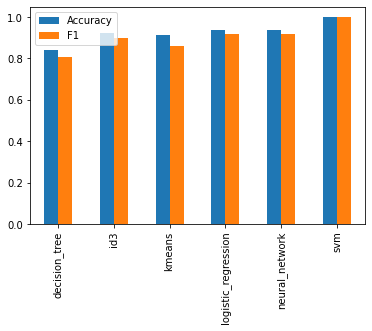

In [346]:
bc_accuracy_df = pd.DataFrame.from_dict(bc_accuracy_scores, orient='index')
bc_f1_df = pd.DataFrame.from_dict(bc_f1_scores, orient='index')
bc_scores = pd.concat([bc_accuracy_df, bc_f1_df], axis=1)
bc_scores.columns = ['Accuracy', 'F1 Score']

plt.figure()
bc_scores.plot(kind="bar")

plt.show()

### Analisis Akurasi dan F1 Score dari masing-masing Algoritma pada dataset Breast Cancer
Secara kesulurhan, algoritma dengan skor tertinggi adalah SVM dengan Akurasi dan F1 Score adalah 1.
Sedangkan untuk algoritma dengan skor terendah adalah Decision Tree dengan nilai Akurasi 0.842 dan F1 Score adalah 0.804

<Figure size 432x288 with 0 Axes>

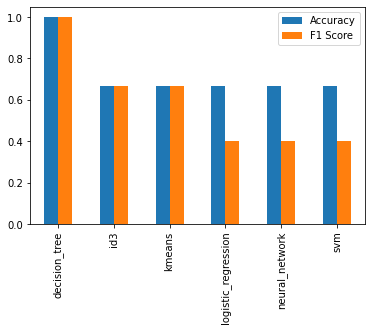

In [347]:
pt_accuracy_df = pd.DataFrame.from_dict(pt_accuracy_scores, orient='index')
pt_f1_df = pd.DataFrame.from_dict(pt_f1_scores, orient='index')
pt_scores = pd.concat([pt_accuracy_df, pt_f1_df], axis=1)
pt_scores.columns = ['Accuracy', 'F1 Score']

plt.figure()
pt_scores.plot(kind="bar")

plt.show()

### Analisis Akurasi dan F1 Score dari masing-masing Algoritma pada dataset Play Tennis
Secara kesulurhan, algoritma dengan skor tertinggi adalah Decision Tree dengan Akurasi dan F1 Score adalah 1.
Sedangkan untuk algoritma dengan skor terendah adalah Logistic Regression, Neural Network, dan SVM dengan nilai Akurasi dan F1 Score yang sama yaitu 0.667 dan 0.4. Juga untuk kelima algoritma selain Decision Tree memiliki nilai Akurasi yang sama yaitu 0.667.

## Kesimpulan
Dapat dilihat secara akesulurahn nilai rata-rata algoritma yang diterapkan pada dataset Breast Cancer lebih tinggi dibandingkan pada dataset Play Tennis. Ini disebabkan jumlah data yang lebih banyak pada dataset Breast Cancer yaitu 569 yang 80%-nya digunakan untuk Training dan 20%-nya untuk Testing. Dibandingkan dengan Play Tennis yang hanya memiliki 14 instance.